
   APLICAÇÃO METEOROLÓGICA   
 1 - Ver temperatura mínima absoluta
 2 - Ver dia de maior chuva
 3 - Listar dias chuvosos (acima de P)
 4 - Calcular amplitudes térmicas diárias
 5 - Calcular max. sequência de dias secos
 6 - Guardar dados em ficheiro
 7 - Carregar dados de ficheiro
 8 - Mostrar gráficos
 0 - Sair
------------------------------
 (Atualmente em memória: 7 registos) 


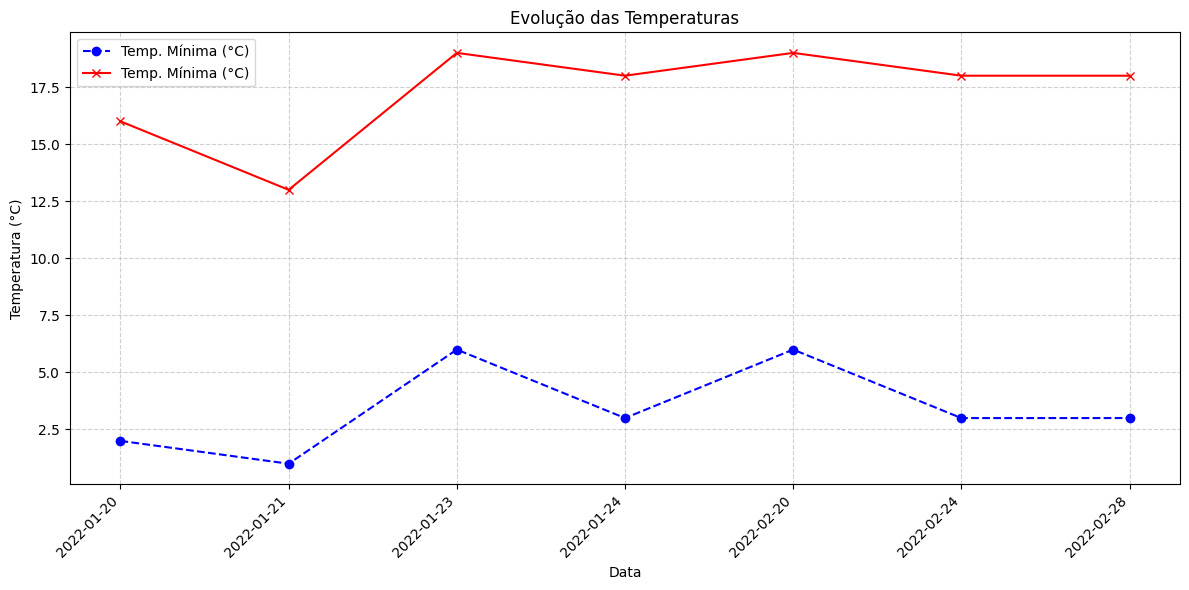

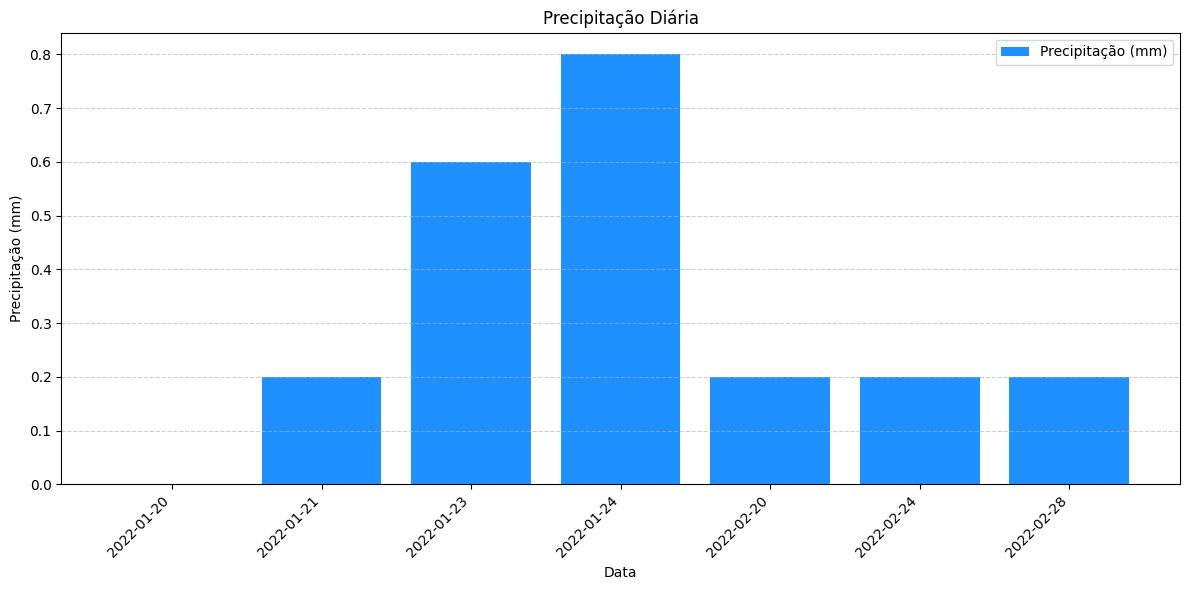


   APLICAÇÃO METEOROLÓGICA   
 1 - Ver temperatura mínima absoluta
 2 - Ver dia de maior chuva
 3 - Listar dias chuvosos (acima de P)
 4 - Calcular amplitudes térmicas diárias
 5 - Calcular max. sequência de dias secos
 6 - Guardar dados em ficheiro
 7 - Carregar dados de ficheiro
 8 - Mostrar gráficos
 0 - Sair
------------------------------
 (Atualmente em memória: 7 registos) 

A sair da aplicação. Adeus!


In [4]:
from matplotlib import pyplot as plt

def calcular_medias_diarias(tabela_meteo):
    medias = []
    for registo in tabela_meteo:
        data = registo[0]
        temp_media = (registo[1] + registo[2]) / 2
        medias.append((data, temp_media))
    return medias

def encontrar_temp_minima_abs(tabela_meteo):
    if not tabela_meteo:
        return None
    return min(registo[1] for registo in tabela_meteo)

def calcular_amplitudes_termicas(tabela_meteo):
    return [(reg[0], reg[2] - reg[1]) for reg in tabela_meteo]

def encontrar_dia_mais_chuvoso(tabela_meteo):
    if not tabela_meteo:
        return (None, None)
    
    registo_max = max(tabela_meteo, key=lambda reg: reg[3])
    
    return (registo_max[0], registo_max[3])

def listar_dias_chuvosos(tabela_meteo, limite_precipitacao):
    dias_encontrados = []
    for data, tmin, tmax, prec in tabela_meteo:
        if prec > limite_precipitacao:
            dias_encontrados.append((data, prec))
    return dias_encontrados

def calcular_max_sequencia_dias_secos(tabela_meteo, limite_seco):
    max_sequencia = 0
    sequencia_atual = 0
    
    for _, _, _, prec in tabela_meteo:
        if prec < limite_seco:
            sequencia_atual += 1
        else:
            if sequencia_atual > max_sequencia:
                max_sequencia = sequencia_atual
            sequencia_atual = 0
    
    return max(max_sequencia, sequencia_atual)

def guardar_dados(tabela, nome_ficheiro):
    with open(nome_ficheiro, 'w', encoding='utf-8') as f:
        for (ano, mes, dia), tmin, tmax, prec in tabela:
            data_formatada = f"{ano:04d}-{mes:02d}-{dia:02d}"
            linha = f"{data_formatada};{tmin};{tmax};{prec}\n"
            f.write(linha)
    print("Dados guardados com sucesso")
        
def carregar_dados(nome_ficheiro):
    tabela = []
    with open(nome_ficheiro, 'r', encoding='utf-8') as f:
        print("\n A carregar dados...")
        for i, linha in enumerate(f, 1):
            linha_limpa = linha.strip()
            
            if not linha_limpa:
                continue
            
            partes = linha_limpa.split(';')
            d_str, tmin_str, tmax_str, prec_str = partes
            ano_str, mes_str, dia_str = d_str.split('-')

            data = (int(ano_str), int(mes_str), int(dia_str))
            registo = (data, float(tmin_str), float(tmax_str), float(prec_str))
            tabela.append(registo)
                    
    if tabela:
         print(f"-> Dados carregados com sucesso. Total de {len(tabela)} registos.")
    else:
         print("-> O ficheiro estava vazio ou não foi possível ler registos.")
    return tabela

def mostrar_graficos(tabela):
    if not tabela:
        print("Não há dados para mostrar no gráfico.")
        return

    datas_str = [f"{d[0]}-{d[1]:02d}-{d[2]:02d}" for d, _, _, _ in tabela]
    temps_min = [tmin for _, tmin, _, _ in tabela]
    temps_max = [tmax for _, _, tmax, _ in tabela]
    precipitacao = [prec for _, _, _, prec in tabela]

    plt.figure(figsize=(12, 6))
    plt.plot(datas_str, temps_min, label="Temp. Mínima (°C)", color="blue", marker="o", linestyle="--")
    plt.plot(datas_str, temps_max, label="Temp. Mínima (°C)", color="red", marker="x")
    plt.legend()
    plt.title("Evolução das Temperaturas")
    plt.xlabel("Data")
    plt.ylabel("Temperatura (°C)")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.bar(datas_str, precipitacao, label="Precipitação (mm)", color="dodgerblue")
    plt.legend()
    plt.title("Precipitação Diária")
    plt.xlabel("Data")
    plt.ylabel("Precipitação (mm)")
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def mostrar_menu():
    print("\n" + "="*30)
    print("   APLICAÇÃO METEOROLÓGICA   ")
    print("="*30)
    print(" 1 - Ver temperatura mínima absoluta")
    print(" 2 - Ver dia de maior chuva")
    print(" 3 - Listar dias chuvosos (acima de P)")
    print(" 4 - Calcular amplitudes térmicas diárias")
    print(" 5 - Calcular max. sequência de dias secos")
    print(" 6 - Guardar dados em ficheiro")
    print(" 7 - Carregar dados de ficheiro")
    print(" 8 - Mostrar gráficos")
    print(" 0 - Sair")
    print("-"*30)

def executar_menu():
    dados_meteo = [
        ((2022,1,20), 2, 16, 0),
        ((2022,1,21), 1, 13, 0.2),
        ((2022,1,23), 6, 19, 0.6),
        ((2022,1,24), 3, 18, 0.8),
        ((2022,2,20), 6, 19, 0.2),
        ((2022,2,24), 3, 18, 0.2),
        ((2022,2,28), 3, 18, 0.2)
    ]
    
    while True:
        mostrar_menu()
        print(f" (Atualmente em memória: {len(dados_meteo)} registos) ")
        opcao_str = input("Escolha uma opção: ")
        opcao = int(opcao_str)

        if opcao == 1:
            minima = encontrar_temp_minima_abs(dados_meteo)
            if minima is not None:
                print(f"\n-> Temperatura mínima absoluta: {minima} °C")
            else:
                print("\n-> Não há dados para calcular.")
        
        elif opcao == 2:
            data, chuva = encontrar_dia_mais_chuvoso(dados_meteo)
            if data is not None:
                print(f"\n-> Dia de maior chuva: {data} com {chuva} mm")
            else:
                print("\n-> Não há dados para calcular.")
        
        elif opcao == 3:
            p_str = input("Insira o valor de precipitação (mm) (ex: 0.5): ")
            p = float(p_str)
            dias = listar_dias_chuvosos(dados_meteo, p)
            print(f"\n-> Dias com chuva > {p} mm:")
            if not dias:
                print("   (Nenhum dia encontrado)")
            else:
                for data, chuva in dias[:20]:
                    print(f"   - {data}: {chuva} mm")
                if len(dias) > 20:
                    print(f"   ...e mais {len(dias) - 20} dias (não mostrados).")

        elif opcao == 4:
            amplitudes = calcular_amplitudes_termicas(dados_meteo)
            print("\n-> Amplitude térmica (Max - Min) por dia:")
            if not amplitudes:
                print("   (Nenhum dado)")
            else:
                for data, amp in amplitudes[:20]:
                    print(f"   - {data}: {amp:.1f} °C")
                if len(amplitudes) > 20:
                    print(f"   ...e mais {len(amplitudes) - 20} dias (não mostrados).")
        
        elif opcao == 5:
            p_str = input("Valor limite para dia 'seco' (ex: 0.1): ")
            p = float(p_str)
            seq = calcular_max_sequencia_dias_secos(dados_meteo, p)
            print(f"\n-> Maior sequência de dias secos (< {p} mm): {seq} dias")
                
        elif opcao == 6:
            nome = input("Nome do ficheiro para guardar (ex: dados.txt): ")
            guardar_dados(dados_meteo, nome)
        
        elif opcao == 7:
            nome = input("Nome do ficheiro para carregar (ex: dados.txt): ")
            novos_dados = carregar_dados(nome)
            dados_meteo = novos_dados
                
        elif opcao == 8:
            mostrar_graficos(dados_meteo)
            
        elif opcao == 0:
            print("\nA sair da aplicação. Adeus!")
            break
            
        else:
            print("\nOpção inválida. Tente novamente.")


executar_menu()

